In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as plx
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

In [2]:
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
sns.set(rc={'figure.figsize':(20.0,20.0)})

# Data preparation

## Reading data

In [3]:
def read_df(path):
    df = pd.read_csv(path)
    df['function name'] = df['function name'].astype('string').fillna('')
    df['modifiers'] = df['modifiers'].astype('string').fillna('')
    df['type params'] = df['type params'].astype('string').fillna('')
    df['type params number'] = df['type params number'].astype(int)
    df['type params have bound'] = df['type params have bound'].astype(bool)
    df['params number'] = df['params number'].astype(int)
    df['has block body'] = df['has block body'].astype(bool)
    df['has initializer'] = df['has initializer'].astype(bool)
    df['body length'] = df['body length'].astype(int)
    df['is top level'] = df['is top level'].astype(bool)
    df['is inside class'] = df['is inside class'].astype(bool)
    df['is inside function'] = df['is inside function'].astype(bool)
    df['is functional expression'] = df['is functional expression'].astype(bool)
    df['line number'] = df['line number'].astype(int)
    df['file path'] = df['file path'].astype('string')
    return df

ktor = read_df('../output/ktor.csv')
strikt = read_df('../output/strikt.csv')

ktor['project'] = 'ktor'
strikt['project'] = 'strikt'
both = pd.concat((ktor, strikt), axis=0, ignore_index=True)

In [4]:
both['is utils'] = both['file path'].apply(lambda path: 'util' in path)
both['is test'] = both['file path'].apply(lambda path: 'test' in path)

## Vectorizing function names

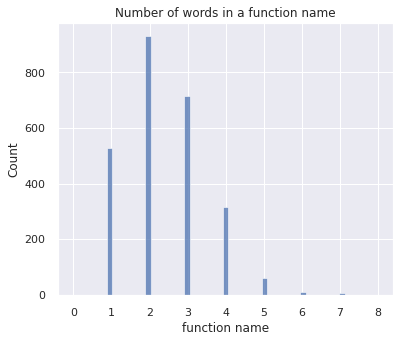

In [5]:
_, ax = plt.subplots(figsize=(6, 5))

fn_name_n_words = both['function name'].apply(lambda name: len(name.split()))
sns.histplot(data=fn_name_n_words, ax=ax)

ax.set_title("Number of words in a function name")
plt.show()

Judging by the chart, I think vectorizing with a ngram_range=(1, 3) will be enough

In [6]:
fn_names_vectorizer = CountVectorizer(ngram_range=(1, 3))
vectorized_names_sparse = fn_names_vectorizer.fit_transform(both['function name'])
both_names = pd.DataFrame(vectorized_names_sparse.todense())
both_names.columns = fn_names_vectorizer.get_feature_names()
both_names.head()

,absent,absolute,accept,accept charset,accept charset items,accept encoding,accept encoding items,accept items,accept language,accept language items,...,xx informational,xx redirection,xx server,xx server error,xx success,year,zero,zoned,zoned date,zoned date time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Vectorizing modifiers

In [7]:
mod_vectorizer = CountVectorizer(ngram_range=(1, 3))
vectorized_mods_sparse = mod_vectorizer.fit_transform(both['modifiers'])
both_mods = pd.DataFrame(vectorized_mods_sparse.todense())
both_mods.columns = mod_vectorizer.get_feature_names()
both_mods.head() 

,abstract,actual,actual inline,actual suspend,expect,expect inline,expect suspend,infix,inline,inline infix,...,public expect suspend,public inline,public inline operator,public open,public operator,public suspend,public suspend inline,suspend,suspend inline,tailrec
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Adding vectorized data to the dataframe

In [8]:
mods_simple_vect = CountVectorizer()
mods = mods_simple_vect.fit_transform(both['modifiers'])
mods = pd.DataFrame(mods.todense())
mods.columns = mods_simple_vect.get_feature_names()

both = pd.concat([both, mods], axis=1)
both.head()

,function name,modifiers,type params,type params number,type params have bound,params number,has block body,has initializer,body length,is top level,...,inline,internal,open,operator,override,private,protected,public,suspend,tailrec
0,decode stream,internal inline,,0,False,2,True,False,4,True,...,1,1,0,0,0,0,0,0,0,0
1,send packet,public,,0,False,1,True,False,2,True,...,0,0,0,0,0,0,0,1,0,0
2,send packet,public inline,,0,False,1,True,False,2,True,...,1,0,0,0,0,0,0,1,0,0
3,packet,public inline,,0,False,0,True,False,3,True,...,1,0,0,0,0,0,0,1,0,0
4,to ktor,internal,,0,False,0,False,True,4,True,...,0,1,0,0,0,0,0,0,0,0


# Working with data

## How developers see their extension functions

Extensions are often viewed as util functions. (They place it in a folder or a file that has a word `util` in it)

In [9]:
plx.pie(both, names='is utils', title='Is extension considered a *util* function?')


## Analyzing words' frequencies in function names

Since it should be possible to infer from the function's name what it does and how it is to be used, we will analyze function names first.

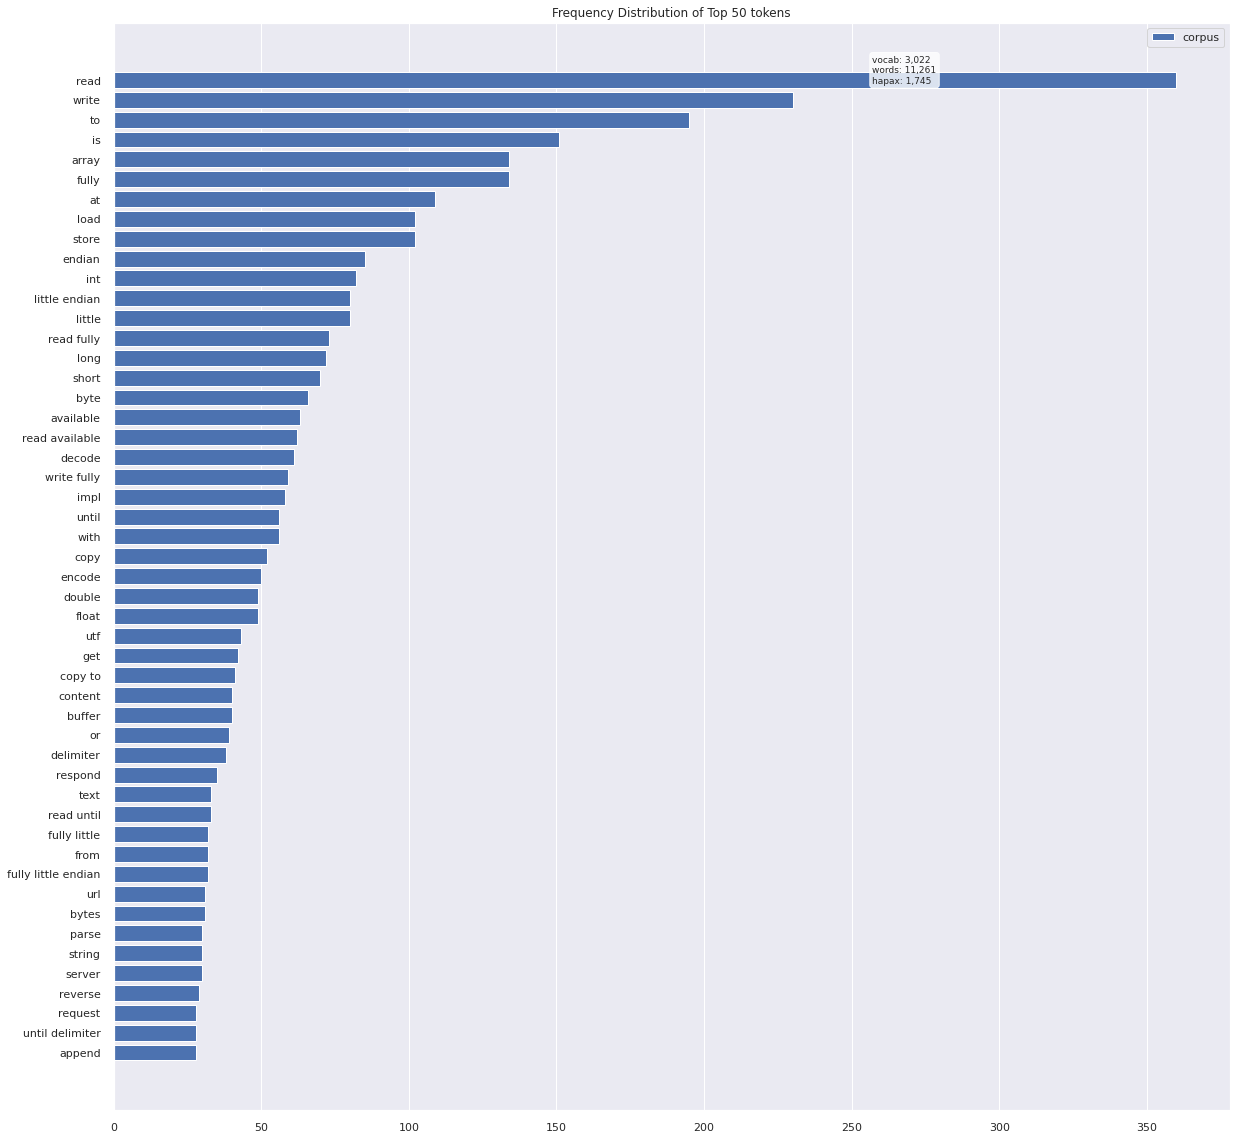

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [10]:
visualizer = FreqDistVisualizer(features=fn_names_vectorizer.get_feature_names(), orient='h')
visualizer.fit(vectorized_names_sparse)
visualizer.show()

I can imagine how tokens like `is` and `to` can be at the top but I cannot wrap my head around why `read` and `write` are the most common words in *extension* function names.

In hardcore OOP languages such as Java a textbook approach would be to extract all reading and writing functionality into a separate class such as `InputReader` `InputWriter`. However, according to the graph, that style of coding might be losing its popularity.

## Analyzing modifier frequencies

This section hints where extension functions are used and how they interact with the other code.

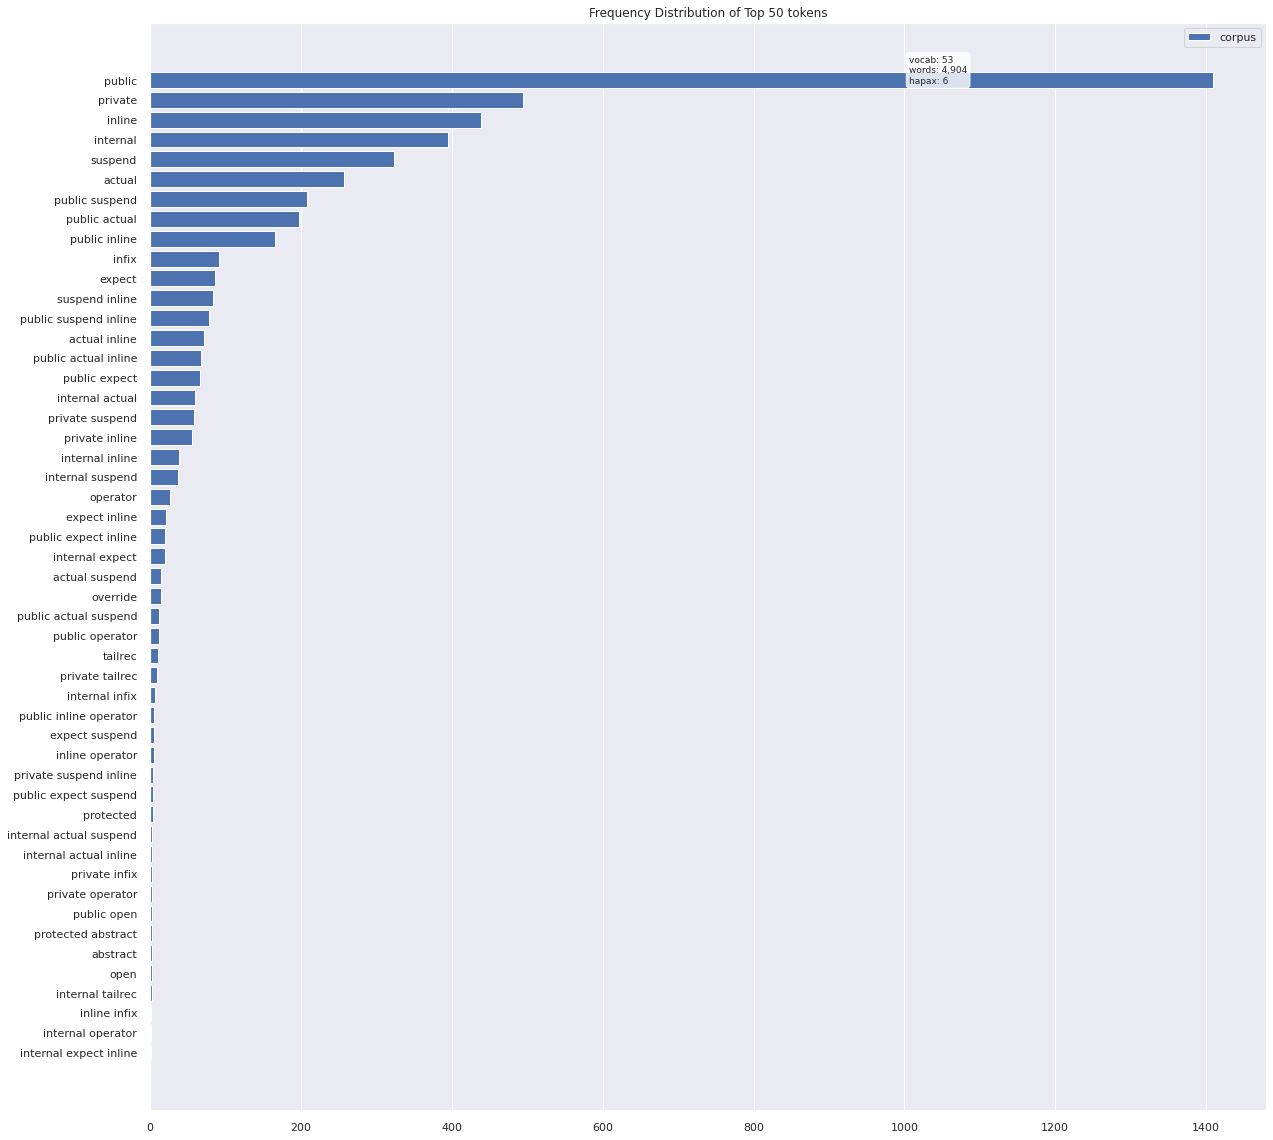

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [11]:
visualizer = FreqDistVisualizer(features=mod_vectorizer.get_feature_names(), orient='h')
visualizer.fit(vectorized_mods_sparse)
visualizer.show()

In [12]:
print("Number of extension functions that are used without any modifiers", (both['modifiers'] == '').sum())

Number of extension functions that are used without any modifiers 158


Expectedly, the most common way of using extension functions is with a `public` modifier by publicly extending existing classes.

When extension function is private it is only seen by a few functions. I think `private` extension functions are used for the sole purpose of making code more readable because developers prefer `obj.f()` syntax to `f(obj)`.

Also, I did not expect the number of functions without any modifiers to be this low.

In [13]:
plx.pie(data_frame=both[both.private == 1], names='is top level', title='The extension is private. Is it top level?')

And again because Kotlin is close to Java I would expect private functions to be inside classes.

## Type parameters (Generics)

Since extension functions can do what regular methods cannot when used together with generics I expect a considerable number of `public` extension functions to be written with type parameters that are bounded by other types. For example, `<T>` is an unbounded type parameter and `<T : Number>` is bounded by type `Number`.

In [14]:
both['has type params'] = both['type params'].apply(lambda x: x != '')
public = both[both.public == 1]
plx.pie(public, names='has type params', title='Do public extensions use generics?')

In [15]:
plx.pie(public[public['has type params']], names='type params have bound', title='Do generic extensions have bounds for their generics?')

It is fascinating to see a 50% split in this situation.

Extension functions without type parameter bounds probably use generics to specify how return type depends on the types of provided arguments.

Extension functions with type parameter bounds are like methods that only appear when certain conditions are met. They are the magic of Kotlin, in my opinion.

# Body length (in lines)

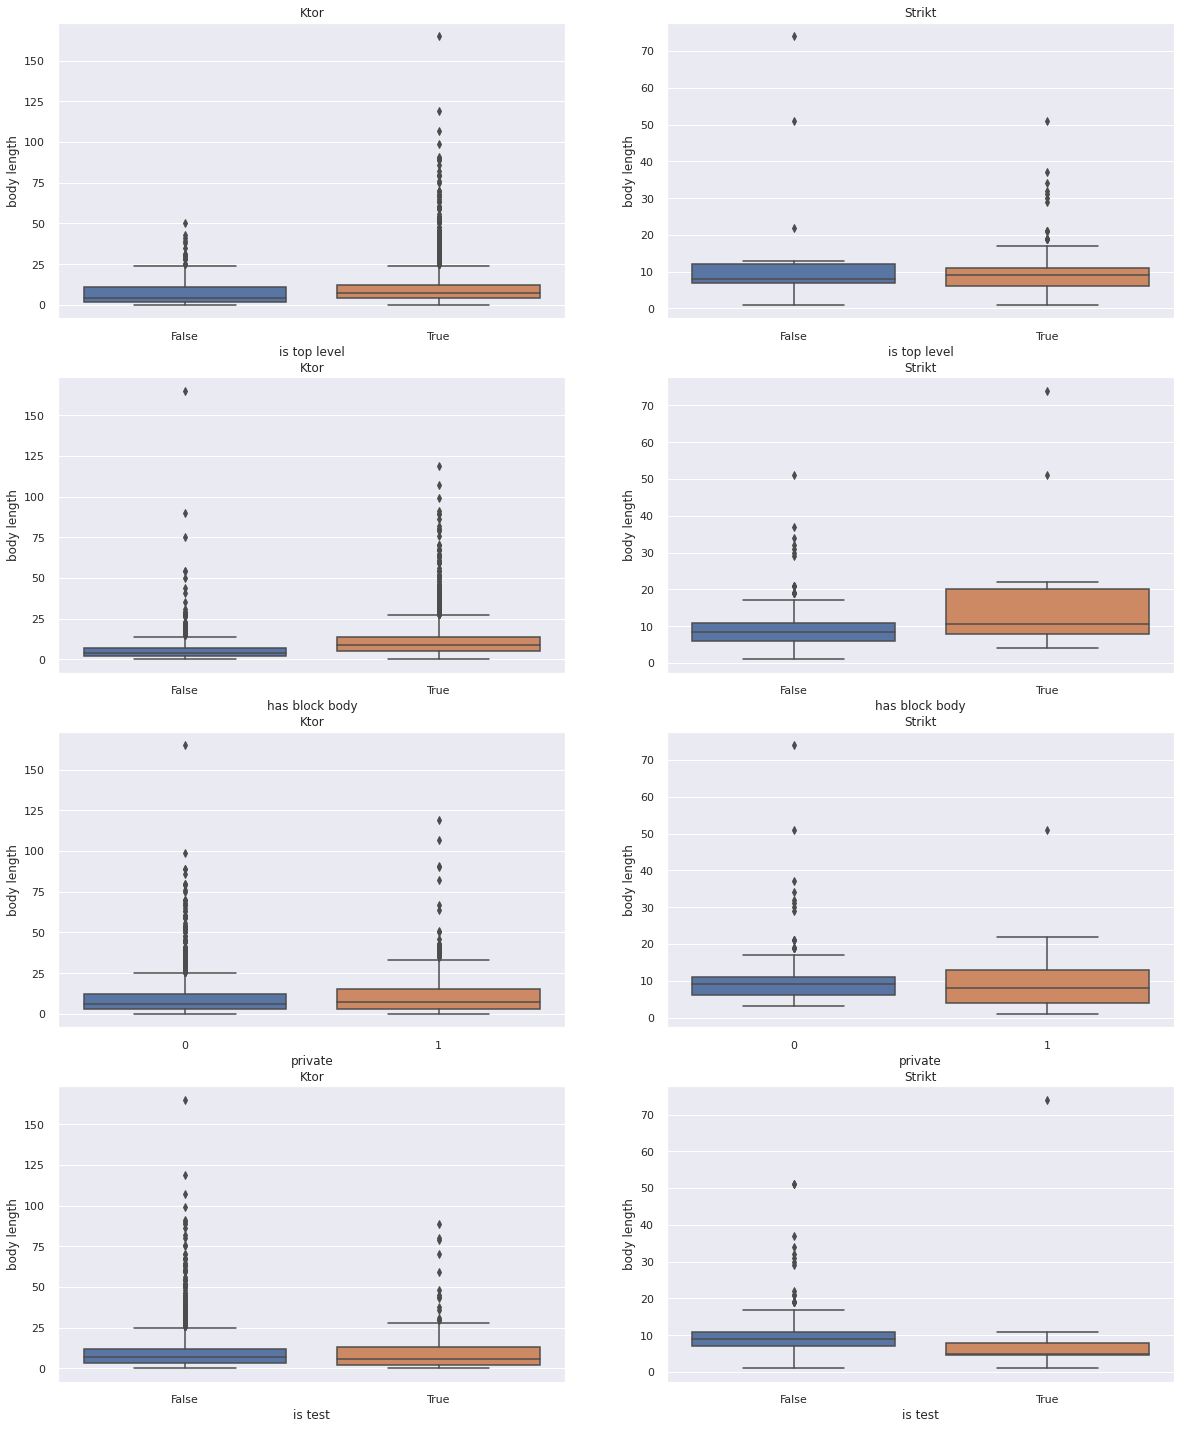

In [16]:
_, ax = plt.subplots(ncols=2, nrows=4, figsize=(20, 25))

def hist_for_both_projects(y, x, row_num):
    ax[row_num, 0].set_title('Ktor')
    sns.boxplot(data=both[both.project == 'ktor'], y=y, x=x, ax=ax[row_num, 0])
    ax[row_num, 1].set_title('Strikt')
    sns.boxplot(data=both[both.project == 'strikt'], y=y, x=x, ax=ax[row_num, 1])

hist_for_both_projects(y='body length', x='is top level', row_num=0)
hist_for_both_projects(y='body length', x='has block body', row_num=1)
hist_for_both_projects(y='body length', x='private', row_num=2)
hist_for_both_projects(y='body length', x='is test', row_num=3)

Public extensions have lower variance (if one would to eyeball it), than private ones, which indicates that private extensions tend to contain *business logic*, whereas public extensions usually only *extend* the existing functionality.

## Number of arguments 

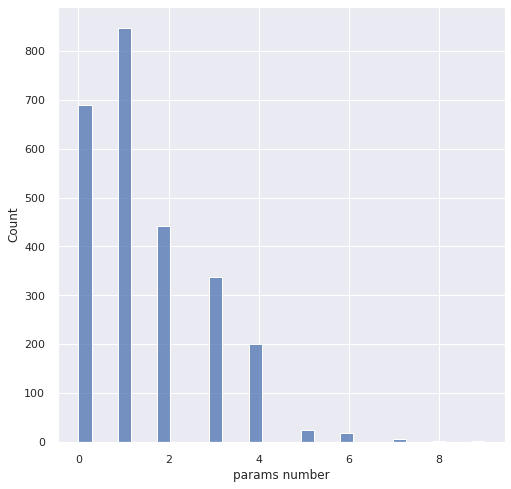

In [29]:
_, ax = plt.subplots(figsize=(8, 8))
sns.histplot(data=both, x='params number', ax=ax)

plt.show()

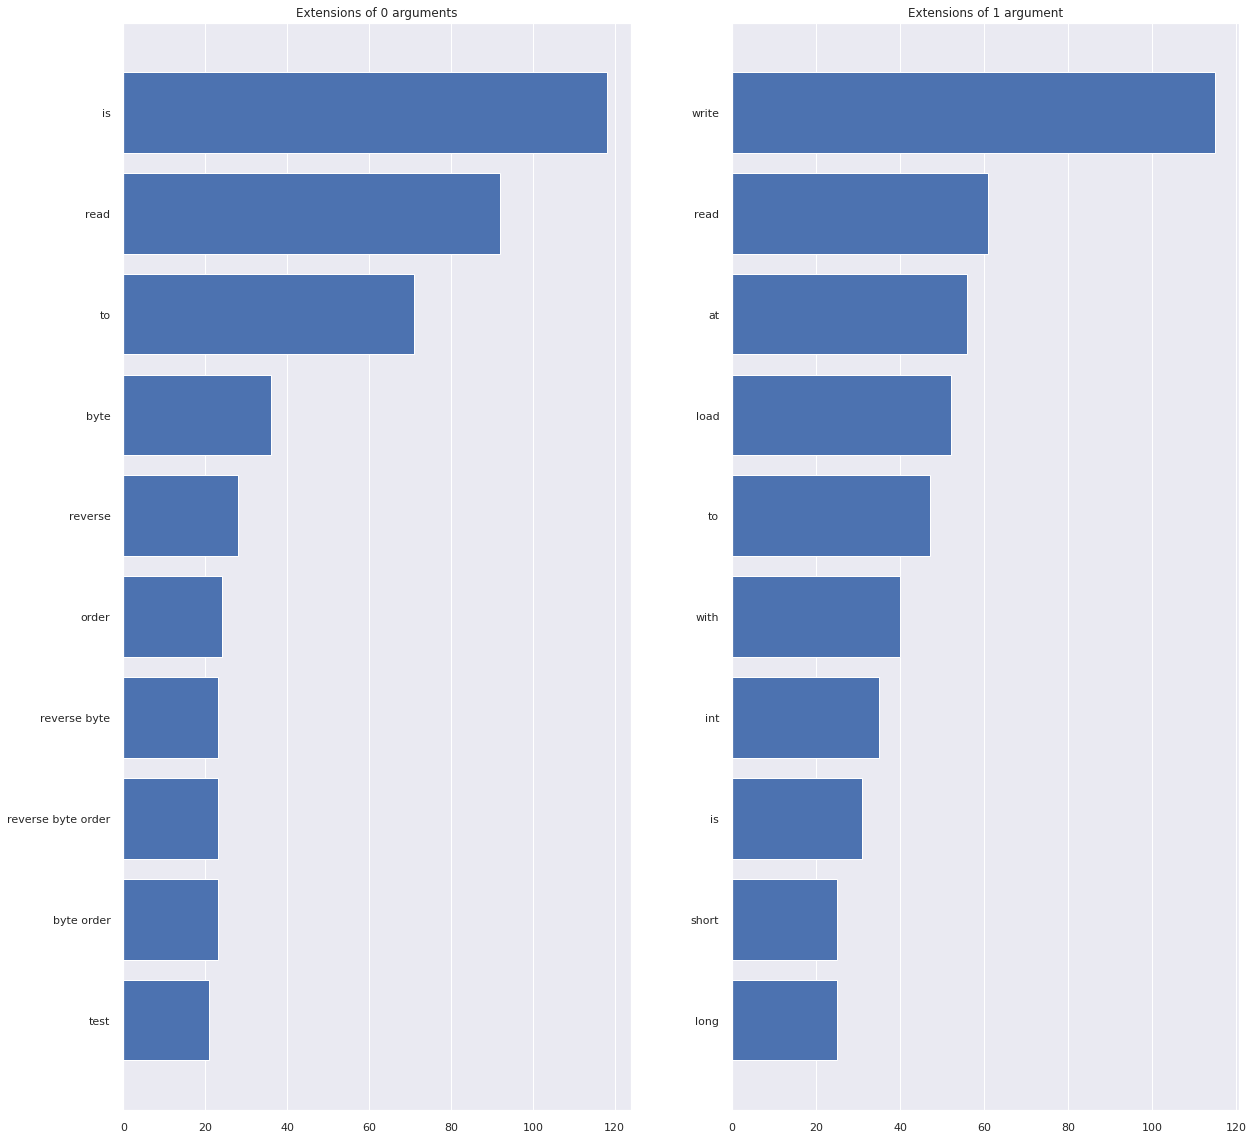

In [18]:
_, ax = plt.subplots(nrows=1, ncols=2)


visualizer = FreqDistVisualizer(features=fn_names_vectorizer.get_feature_names(), orient='h', ax=ax[0], n=10)
visualizer.fit(fn_names_vectorizer.transform(both[both['params number'] == 0]['function name']))

visualizer2 = FreqDistVisualizer(features=fn_names_vectorizer.get_feature_names(), orient='h', ax=ax[1], n=10)
visualizer2.fit(fn_names_vectorizer.transform(both[both['params number'] == 1]['function name']))

ax[0].set_title('Extensions of 0 arguments')
ax[1].set_title('Extensions of 1 argument')

plt.show()

The most common use case for extensions of 0 arguments is to check whether something `is` true. The second use case is to return a `read`er for something.

Extensions of 1 argument usually are used to `write` data.

## Extension functions inside other functions

In [19]:
plx.pie(both, names='is inside function', title='Is extension function inside another function?')

In [20]:
inside_functions = both[both['is inside function'] == 1]
plx.pie(inside_functions, names='is test', title='Extension is inside another function. Is it a test function?')

Most of extension functions that are written inside another functions are used for testing purposes. For example:

```kotlin
@Test
    fun testCloseResponseWithConnectionPipeline() = clientTests {
        suspend fun HttpClient.testCall(): HttpResponse = request {
            url.takeFrom("$TEST_SERVER/content/xxx")
        }

        test { client ->
            client.testCall()
            assertEquals(testContent, client.testCall().receive())
        }
    }
```

The only remaining extension function (that is inside another function but is not for testing) is created like this to be instantly passed to another object

```kotlin
val interceptor: HttpRequestBuilder.() -> Unit = when (configure) {
        null -> settings.accessTokenInterceptor
        else -> fun HttpRequestBuilder.() {
            settings.accessTokenInterceptor(this)
            configure()
        }
    }

    return oauth2RequestAccessToken(
        client,
        settings.requestMethod,
        usedRedirectUrl,
        settings.accessTokenUrl,
        settings.clientId,
        settings.clientSecret,
        callbackResponse.state,
        callbackResponse.token,
        extraParameters,
        interceptor,
        settings.accessTokenRequiresBasicAuth,
        settings.nonceManager,
        settings.passParamsInURL
    )
```

## Extensions that are used in testing

In [30]:
tests = both[both['is test']]

### Where is the extension function that is used for testing?

Most of the extensions that are used for testing are declared inside classes.

In [22]:
plx.pie(tests, names='is inside class', title='Extension is used for testing. Is it inside class?')

### What is it used for

Most of the extensions that are used in testing accept 0 parameters: `T.() -> ..`. And check whether their receiver object (`T`) is valid (whether the test should pass). This is proven by the following diagrams

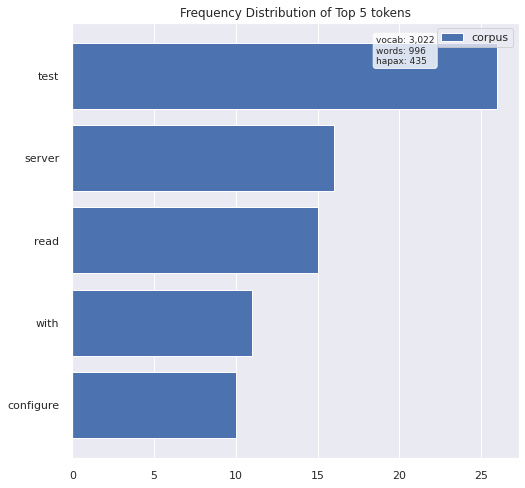

<AxesSubplot:title={'center':'Frequency Distribution of Top 5 tokens'}>

In [23]:
_, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=fn_names_vectorizer.get_feature_names(), orient='h', n=5, ax=ax)
visualizer.fit(fn_names_vectorizer.transform(tests['function name']))
visualizer.show()

<AxesSubplot:title={'center':'Extension is used in testing. How many parameters does it receive?'}, xlabel='params number', ylabel='count'>

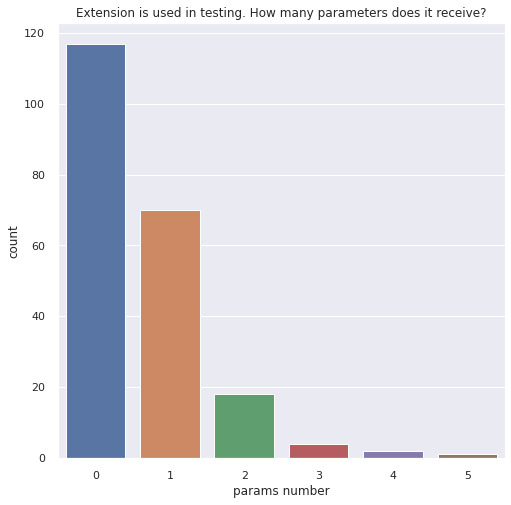

In [24]:
_, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Extension is used in testing. How many parameters does it receive?')
sns.countplot(data=tests, x='params number', ax=ax)